In [1]:
# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [6]:
import numpy as np 
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, data_home='../../data/')

N = 200
X = mnist.data[np.random.choice(mnist.data.shape[0], N)]/255.

In [8]:
print("Shape of minst data:", mnist.data.shape)

Shape of minst data: (70000, 784)


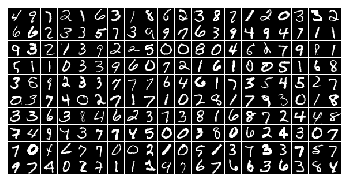

In [10]:
from display_network import *
from matplotlib.backends.backend_pdf import PdfPages


plt.axis('off')
A = display_network(X.T, 10, N//10)
f2 = plt.imshow(A, interpolation='nearest' )
plt.gray()
plt.savefig('mnist_ex.png', bbox_inches='tight', dpi = 600)
plt.show()

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)


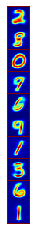

In [29]:
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors

K = 10          # number of clusters 
N = 10000       # number of samples 
X = mnist.data[np.random.choice(mnist.data.shape[0], N)]
kmeans = KMeans(n_clusters=K).fit(X)
pred_label = kmeans.predict(X)

plt.axis('off')
A = display_network(kmeans.cluster_centers_.T, 10, 1)
f2 = plt.imshow(A, interpolation='nearest',cmap = plt.cm.jet )

plt.savefig('mnist_centroids.png', bbox_inches='tight', dpi = 600)
plt.show()

In [34]:
N0 = 10;
K = 10
X1 = np.zeros((N0*K, 784))
X2 = np.zeros((N0*K, 784))

for k in range(K):
  
    Xk = X[pred_label == k, :]
    
    # random points in each cluster 
    X1[N0*k: N0*k + N0,:] = Xk[:N0, :]
    
    # N0 nearest points 
    centroid_k = kmeans.cluster_centers_[k]
    
    neigh = NearestNeighbors(N0) # get 5 nearest neighbors 
    
    neigh.fit(Xk)
#     print(centroid_k.shape)
#     print(neigh.kneighbors([centroid_k], N0))
    X2[N0*k: N0*k + N0,:] = Xk[neigh.kneighbors([centroid_k], N0)[1][0], :]
    

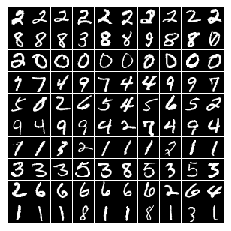

In [33]:
# random points in cluster 
plt.axis('off')
A = display_network(X1.T, K, N0)
f2 = plt.imshow(A, interpolation='nearest' )
plt.gray()
plt.savefig('mnist_cluster_random.png', bbox_inches='tight', dpi = 600)
plt.show()